In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('bitcoin_class.csv')

In [6]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend
...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend


In [7]:
df.fillna(df.median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend
...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend


In [9]:
# df=pd.DataFrame({'Timestamp':[1325317920,1617148800]})
df1=pd.to_datetime(df['Timestamp'],unit='s')

In [10]:
df1

0      2021-01-28 02:44:00
1      2021-01-28 02:45:00
2      2021-01-28 02:46:00
3      2021-01-28 02:47:00
4      2021-01-28 02:48:00
               ...        
2985   2021-01-30 04:29:00
2986   2021-01-30 04:30:00
2987   2021-01-30 04:31:00
2988   2021-01-30 04:32:00
2989   2021-01-30 04:33:00
Name: Timestamp, Length: 2990, dtype: datetime64[ns]

In [15]:
df['Date']=df1

In [16]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend,2021-01-28 02:44:00
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend,2021-01-28 02:45:00
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend,2021-01-28 02:46:00
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend,2021-01-28 02:47:00
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend,2021-01-28 02:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend,2021-01-30 04:29:00
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend,2021-01-30 04:30:00
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend,2021-01-30 04:31:00
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend,2021-01-30 04:32:00


In [19]:
a=df

In [20]:
a

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend,2021-01-28 02:44:00
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend,2021-01-28 02:45:00
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend,2021-01-28 02:46:00
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend,2021-01-28 02:47:00
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend,2021-01-28 02:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend,2021-01-30 04:29:00
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend,2021-01-30 04:30:00
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend,2021-01-30 04:31:00
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend,2021-01-30 04:32:00


In [21]:
a.reset_index()

,index,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
0,0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend,2021-01-28 02:44:00
1,1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend,2021-01-28 02:45:00
2,2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend,2021-01-28 02:46:00
3,3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend,2021-01-28 02:47:00
4,4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend,2021-01-28 02:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend,2021-01-30 04:29:00
2986,2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend,2021-01-30 04:30:00
2987,2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend,2021-01-30 04:31:00
2988,2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend,2021-01-30 04:32:00


In [22]:

train=a[:2500]

In [23]:
test=a[2500:]

In [ ]:
train

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,2.942716e+05,31116.63019,57.664275,31061.534545,uptrend,2021-01-28 02:44:00
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,1.634978e+05,31107.60965,56.185784,31067.118182,uptrend,2021-01-28 02:45:00
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,2.086733e+05,31049.66162,41.040697,31065.537273,downtrend,2021-01-28 02:46:00
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,1.975404e+05,30993.13818,41.683543,31059.636364,downtrend,2021-01-28 02:47:00
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,1.417241e+05,30989.58040,36.737464,31050.465455,downtrend,2021-01-28 02:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2505,1611951540,34225.29,34388.19,34225.29,34383.37,3.323834,1.141783e+05,34351.38062,58.848820,34252.667273,uptrend,2021-01-29 20:19:00
2496,2506,1611951600,34337.55,34445.64,34337.55,34411.92,5.597329,1.925865e+05,34406.85198,59.966533,34269.319091,uptrend,2021-01-29 20:20:00
2497,2507,1611951660,34445.68,34551.00,34350.98,34551.00,24.458240,8.431382e+05,34472.56357,65.097723,34296.682727,uptrend,2021-01-29 20:21:00
2498,2508,1611951720,34562.99,34709.06,34522.10,34699.04,40.806268,1.413142e+06,34630.51137,69.692062,34333.533636,uptrend,2021-01-29 20:22:00


In [ ]:
test

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
2500,2510,1611951840,34626.20,34629.84,34540.08,34540.67,3.929403,135872.31600,34578.35815,59.977429,34398.465455,uptrend,2021-01-29 20:24:00
2501,2511,1611951900,34577.43,34577.43,34481.97,34552.98,2.183560,75405.96625,34533.50115,60.487998,34442.100000,uptrend,2021-01-29 20:25:00
2502,2512,1611951960,34527.15,34532.29,34482.39,34520.96,4.916943,169686.06440,34510.48351,58.337123,34454.493636,uptrend,2021-01-29 20:26:00
2503,2513,1611952020,34480.48,34612.05,34480.48,34569.33,1.651241,57084.53649,34570.68869,60.683680,34476.271818,uptrend,2021-01-29 20:27:00
2504,2514,1611952080,34579.04,34589.00,34526.91,34588.41,0.825288,28516.33845,34553.19819,61.630841,34509.976364,uptrend,2021-01-29 20:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend,2021-01-30 04:29:00
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend,2021-01-30 04:30:00
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend,2021-01-30 04:31:00
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend,2021-01-30 04:32:00


In [ ]:
train_data = train['Close']
test_data = test['Close']

In [ ]:
train_data

0       31096.36
1       31089.69
2       31003.29
3       31006.47
4       30971.13
          ...   
2495    34383.37
2496    34411.92
2497    34551.00
2498    34699.04
2499    34590.82
Name: Close, Length: 2500, dtype: float64

In [ ]:
test_data

2500    34540.67
2501    34552.98
2502    34520.96
2503    34569.33
2504    34588.41
          ...   
2985    33493.19
2986    33550.51
2987    33541.15
2988    33532.81
2989    33543.26
Name: Close, Length: 490, dtype: float64

In [24]:
b=a[:3000]

In [25]:
b

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,rsi,ma,trend,Date
0,10,1611801840,31138.29,31151.69,31082.08,31096.36,9.457052,294271.58860,31116.63019,57.664275,31061.534545,uptrend,2021-01-28 02:44:00
1,11,1611801900,31098.96,31132.31,31089.69,31089.69,5.255878,163497.79000,31107.60965,56.185784,31067.118182,uptrend,2021-01-28 02:45:00
2,12,1611801960,31093.76,31093.76,31003.29,31003.29,6.720632,208673.34570,31049.66162,41.040697,31065.537273,downtrend,2021-01-28 02:46:00
3,13,1611802020,30995.74,31024.19,30964.71,31006.47,6.373681,197540.36850,30993.13818,41.683543,31059.636364,downtrend,2021-01-28 02:47:00
4,14,1611802080,30997.38,31003.76,30965.14,30971.13,4.573283,141724.12060,30989.58040,36.737464,31050.465455,downtrend,2021-01-28 02:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2995,1611980940,33480.06,33493.19,33424.26,33493.19,1.232567,41236.53755,33455.81854,58.426732,33427.873636,uptrend,2021-01-30 04:29:00
2986,2996,1611981000,33507.30,33550.51,33474.50,33550.51,4.604505,154359.95780,33523.67838,63.096361,33453.503636,uptrend,2021-01-30 04:30:00
2987,2997,1611981060,33550.51,33561.29,33515.56,33541.15,1.799579,60350.90710,33536.12787,61.836166,33474.886364,uptrend,2021-01-30 04:31:00
2988,2998,1611981120,33533.78,33575.37,33509.50,33532.81,1.992449,66810.93030,33532.05823,60.637163,33493.350909,uptrend,2021-01-30 04:32:00


In [26]:
b.columns

Index(['Unnamed: 0', 'Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'rsi', 'ma',
       'trend', 'Date'],
      dtype='object')

In [27]:
b.drop('Timestamp',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
b=b.reset_index()['Close']

In [29]:
b

0       31096.36
1       31089.69
2       31003.29
3       31006.47
4       30971.13
          ...   
2985    33493.19
2986    33550.51
2987    33541.15
2988    33532.81
2989    33543.26
Name: Close, Length: 2990, dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
b=scaler.fit_transform(np.array(b).reshape(-1,1))

In [41]:
training_size=int(len(b)*0.65)
test_size=len(b)-training_size
train_data,test_data=b[0:training_size,:],b[training_size:len(b),:1]

In [100]:
data = b

In [95]:
d1 = df.iloc[102:602, 5]
d1=scaler.transform(np.array(d1).reshape(-1,1))
d1.shape

(500, 1)

In [42]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), numpy.array(dataY)

In [82]:
train_data.shape

(1943, 1)

In [55]:
test_data.shape

(1047, 1)

In [83]:
X_train.shape

(1442, 500, 1)

In [97]:
y_train.shape

(1442,)

In [103]:
b_test.shape

(2489, 500)

In [104]:
btest.shape

(2489,)

In [101]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 500
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
b_test, btest = create_dataset(data, time_step)

In [105]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
b_test = b_test.reshape(b_test.shape[0],b_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(LSTM(50,activation='sigmoid',return_sequences=True,input_shape=(500,1)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 500, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 500, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

In [38]:
from tensorflow import keras
import pickle

In [39]:
model = keras.models.load_model('lstm.h5')
scaler = pickle.load(open('sc.pkl', 'rb'))

In [68]:
train_predict=model.predict(X_train[0])
test_predict=model.predict(X_test[0])

In [106]:
tr = model.predict(b_test)

In [ ]:
train_predict

In [ ]:
model.save('lstm.h5')

In [70]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [108]:
b_predict=scaler.inverse_transform(tr)

In [110]:
b_predict[602]

array([32744.006], dtype=float32)

In [111]:
import pickle
file = open('ans.pkl', 'wb')
pickle.dump(b_predict, file)
file.close()

In [ ]:
import pickle
file = open('train.pkl', 'wb')
pickle.dump(scaler, file)
file.close()

In [75]:
train_predict[0]

array([31613.086], dtype=float32)

In [48]:
train_predict.shape

(1442, 1)

In [51]:
X_train

array([[[0.03204287],
        [0.0311844 ],
        [0.02006412],
        ...,
        [0.07305405],
        [0.07680972],
        [0.07991413]],

       [[0.0311844 ],
        [0.02006412],
        [0.02047341],
        ...,
        [0.07680972],
        [0.07991413],
        [0.08231837]],

       [[0.02006412],
        [0.02047341],
        [0.01592491],
        ...,
        [0.07991413],
        [0.08231837],
        [0.08306101]],

       ...,

       [[0.40699831],
        [0.40251545],
        [0.40296464],
        ...,
        [0.75784951],
        [0.78119952],
        [0.78986665]],

       [[0.40251545],
        [0.40296464],
        [0.40406251],
        ...,
        [0.78119952],
        [0.78986665],
        [0.76107105]],

       [[0.40296464],
        [0.40406251],
        [0.40576144],
        ...,
        [0.78986665],
        [0.76107105],
        [0.76614081]]])

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

33216.72248466716

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

34559.83259938315

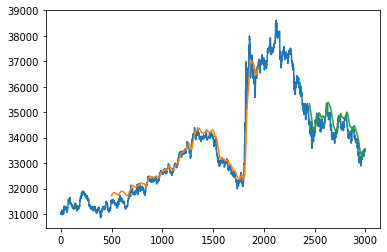

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=500
trainPredictPlot = numpy.empty_like(b)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(b)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(b)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(b))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[550:].reshape(1,-1)
x_input.shape

(1, 500)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.41515704174866386,
 0.4552659792859082,
 0.4482051176445605,
 0.4337757848226227,
 0.4316624171931851,
 0.45510380856647537,
 0.45877839113775654,
 0.47667894959708335,
 0.49573272206126706,
 0.48180405915884883,
 0.4753494071115725,
 0.47693378929904995,
 0.4728125937147265,
 0.4790381474440739,
 0.4814938754812035,
 0.48600505303368635,
 0.4855906167506907,
 0.47912438108059785,
 0.5006892255575908,
 0.5138752495305416,
 0.5112470542203642,
 0.5260226086575992,
 0.521230850019113,
 0.5294796765337679,
 0.5300549964669949,
 0.5077050397768739,
 0.48898590530517083,
 0.5122882932046604,
 0.507150312950877,
 0.5003841901567521,
 0.49872901916317325,
 0.5030278302973521,
 0.4772169445234562,
 0.4815633772181025,
 0.4820151385079523,
 0.46335778335793787,
 0.4721150022073237,
 0.48681075835404464,
 0.5077076139152776,
 0.5110874576393343,
 0.5215976647416403,
 0.5174597372576928,
 0.5072223888261798,
 0.4874118196713084,
 0.4730815911779134,
 0.4793740725057569,
 0.48228413597113917,
 

In [ ]:
from numpy import array

lst_output=[]
n_steps=499
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.45526598 0.44820512 0.43377578 0.43166242 0.45510381 0.45877839
 0.47667895 0.49573272 0.48180406 0.47534941 0.47693379 0.47281259
 0.47903815 0.48149388 0.48600505 0.48559062 0.47912438 0.50068923
 0.51387525 0.51124705 0.52602261 0.52123085 0.52947968 0.530055
 0.50770504 0.48898591 0.51228829 0.50715031 0.50038419 0.49872902
 0.50302783 0.47721694 0.48156338 0.48201514 0.46335778 0.472115
 0.48681076 0.50770761 0.51108746 0.52159766 0.51745974 0.50722239
 0.48741182 0.47308159 0.47937407 0.48228414 0.46191369 0.47012905
 0.47924923 0.46427546 0.47560811 0.48567814 0.49583697 0.50039963
 0.48827158 0.47253201 0.45413593 0.43697801 0.44783315 0.43521473
 0.44163849 0.4583498  0.46194458 0.45060164 0.46506572 0.46593192
 0.46950997 0.47404046 0.48023898 0.49724503 0.47841392 0.49574559
 0.4916141  0.48581199 0.50107535 0.49515225 0.48369219 0.48911847
 0.48594585 0.47677548 0.47655024 0.46358045 0.4701149  0.46367955
 0.45251423 0.46144906 0.45667661 0.46128689 0.4692268

In [ ]:
print(scaler.inverse_transform(lst_output))

[[33497.63985449]
 [33505.72934908]
 [33513.27122361]
 [33520.51555404]
 [33527.54986696]
 [33534.43621826]
 [33541.21999211]
 [33547.93615282]
 [33554.61063421]
 [33561.26427593]
 [33567.91305506]
 [33574.56993851]
 [33581.24303058]
 [33587.94113025]
 [33594.67025787]
 [33601.43504446]
 [33608.24058418]
 [33615.08872943]
 [33621.98387971]
 [33628.92696121]
 [33635.92098412]
 [33642.96756928]
 [33650.06764293]
 [33657.22444676]
 [33664.4379808 ]
 [33671.70917124]
 [33679.04079671]
 [33686.4333203 ]
 [33693.88766824]
 [33701.40546137]
 [33708.98646815]
 [33716.63462497]
 [33724.34877405]
 [33732.13007316]
 [33739.98060627]
 [33747.90153114]
 [33755.89307931]
 [33763.95687165]
 [33772.09383436]
 [33780.30651453]
 [33788.59398593]
 [33796.95879565]
 [33805.40163833]
 [33813.92390328]
 [33822.52674827]
 [33831.21179416]
 [33839.98019871]
 [33848.83242502]
 [33857.77125171]
 [33866.79621568]]


In [ ]:
day_new=np.arange(1,499)
day_pred=np.arange(500,550)

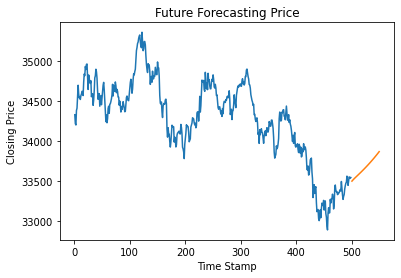

In [ ]:
# plt.figure(figsize=(4,5))
plt.xlabel('Time Stamp')
plt.ylabel('Closing Price')
plt.title('Future Forecasting Price')
# plt.axvline(x=498.2,color='darkkhaki')
plt.plot(day_new,scaler.inverse_transform(b[2502:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))